# 단순선형회귀 연습문제

# 문제1

## #01. 작업준비

### 패키지 참조

In [2]:
from pandas import read_excel
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os

In [3]:
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import pearson_r

In [4]:
# 회귀분석 모듈 활용
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import ext_ols

### 데이터 가져오기

수분함유량에 따른 강도

In [6]:
df = read_excel("https://data.hossam.kr/E04/beans.xlsx")
df

,수분함유량,강도
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31
5,36,29
6,40,34
7,33,30
8,26,25
9,36,31


## #02. 탐색적 데이터분석

### 산점도 그래프

In [4]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['axes.unicode_minus'] = False

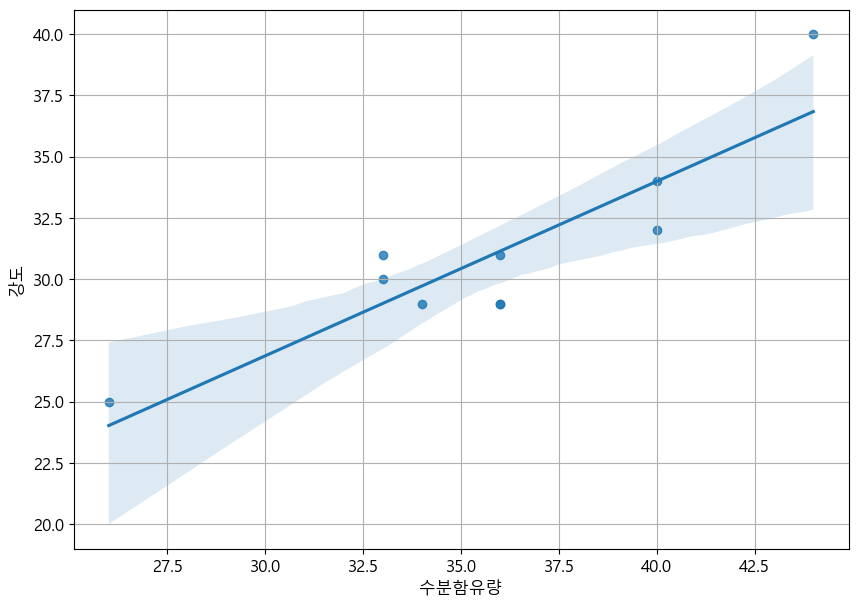

In [5]:
sb.regplot(df, x='수분함유량', y='강도')
plt.grid()
plt.show()
plt.close()

## #03. 추론통계

### 1) 상관분석

In [6]:
pearson_r(df)

,statistic,pvalue,result
fields,,,
수분함유량vs강도,0.888052,0.000599,True
강도vs수분함유량,0.888052,0.000599,True


> 상관분석결과 : p-value가 0.05보다 작으므로 수분함유량과 강도 간의 양의 상관관계가 통계적으로 유의함을 알 수 있다.

### 2) 회귀분석

#### 분석을 위한 학습모델 구성

In [7]:
model = ols("강도 ~ 수분함유량", data=df)
model

#### 분석수행

In [8]:
fit = model.fit()
fit

#### 분석결과 수행

In [9]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                     강도   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     29.85
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           0.000599
Time:                        16:27:37   Log-Likelihood:                -19.614
No. Observations:                  10   AIC:                             43.23
Df Residuals:                       8   BIC:                             43.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4991      4.707      1.168      0.2

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### 모형적합도 해석

1) R-squared : 강도를 수분함유량이 약 78% 설명한다.

2) Adj. R-squared : R-squared를 보정한 값 (약 76%~78% 설명한다.)

3) F-statistic / Prob(F-statistic) : 0.000599로서 유의수준 0.05보다 작으므로 유의미성 검증결과 유의미하다. 

4) AIC/BIC :


#### 독립변수보고 해석

1) 회귀계수 coef : intercept(절편)은 5.4991, 수분함유량(기울기)는 0.7123 <br> 수식 : $강도 = 0.7123 \times 수분함유량 + 5.4991$. <br> 절편의 추정치(5.4991)은 수분함유량이 0일때 강도의 값. <br> 수분함유량의 계수 추정치는 0.7123으로 수분함유량이 1증가할 때마다 강도가 0.7123 증가한다는 것을 의미

2) p값 : 모집단에서 계수가 0일때, 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률

## #04. 결과보고

### 모형적합도 보고
- `강도`에 대하여 `수분함유량`을 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미 하였다. (F(1,8)=29.85, p <0.05)

### 독립변수에 대해 보고
- `수분함유량` 의 회귀계수는 0.7123로, `강도`에 대해서 유의미한 예측변인인 것으로 나타났다. (t(8)=5.463, p<0.05)

## #05. 회귀분석 모듈 활용 결과보고

In [16]:
model, fit, summmary, table, result, goodness, varstr = ext_ols(df, x='수분함유량', y='강도')

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
model

In [9]:
fit

In [11]:
summmary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     강도   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     29.85
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           0.000599
Time:                        14:28:49   Log-Likelihood:                -19.614
No. Observations:                  10   AIC:                             43.23
Df Residuals:                       8   BIC:                             43.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4991      4.707      1.168      0.276      -5.355      16.353
수분함유량          0.7123      0.130      5.463      0.001       0.412       1.013
==============================================================================
Omnibus:                        0.502   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.778   Jarque-Bera (JB):                0.530
Skew:                           0.264   Prob(JB):                        0.767
Kurtosis:                       2.004   Cond. No.                         280.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
table

,,B,표준오차,β,t,유의확률,VIF
종속변수,독립변수,,,,,,
강도,수분함유량,0.7123,0.130,0,5.463*,0.001,1.0


In [13]:
result

'𝑅(0.789), 𝑅^2(0.762), 𝐹(29.85), 유의확률(0.000599), Durbin-Watson(1.420)'

In [14]:
goodness

'강도에 대하여 수분함유량로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(1,8) = 29.85, p < 0.05).'

In [15]:
varstr

['수분함유량의 회귀계수는 0.7123(p<0.05)로, 강도에 대하여 유의미한 예측변인인 것으로 나타났다.']

************************

# 문제2

## #01. 데이터 가져오기

In [18]:
df2 = read_excel("https://data.hossam.kr/E04/aircon.xlsx")
df2

,예약대수,판매대수
0,19,33
1,23,51
2,26,40
3,29,49
4,30,50
5,38,69
6,39,70
7,46,64
8,49,89
9,58,98


## #02. 탐색적 데이터 분석

In [19]:
# 그래프 초기화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['axes.unicode_minus'] = False

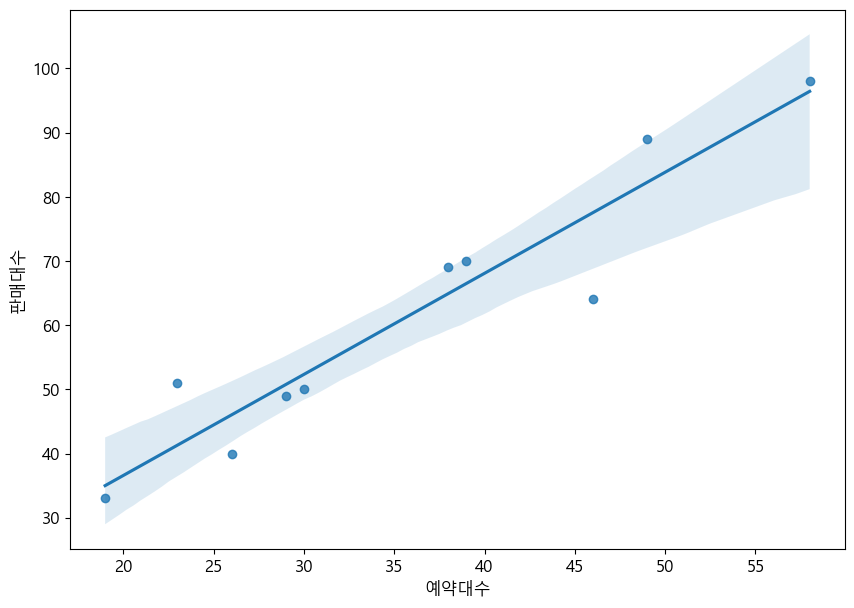

In [20]:
sb.regplot(df2, x='예약대수', y='판매대수')
plt.show()
plt.close()

- 결과해석 : 예약대수(x) 와 판매대수(y)는 양의 상관관계를 갖고 있다.

## #03. 추론통계

In [21]:
# 상관분석
pearson_r(df2)

,statistic,pvalue,result
fields,,,
예약대수vs판매대수,0.946913,0.000033,True
판매대수vs예약대수,0.946913,0.000033,True


- 결과 해석 : 예약대수와 판매대수의 p-value는 0.000033으로 0.05보다 작기때문에 유의미한 상관관계를 갖는다고 할 수 있다.

In [22]:
# 회귀분석

# 모델정의
model = ols("판매대수 ~ 예약대수", data=df2)
model

# 분석수행
fit = model.fit()
fit

# 분석결과수행
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   판매대수   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     69.40
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           3.26e-05
Time:                        14:31:36   Log-Likelihood:                -32.667
No. Observations:                  10   AIC:                             69.33
Df Residuals:                       8   BIC:                             69.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0689      7.113      0.713      0.4

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 결과 해석

#### 모형적합도 해석
1) R-squared / Adj. R-squared : 판매대수(y)를 예약판매(x)가 약 88%~89% 설명한다.

2) F-statistic / Prob(F-statistic) : 3.26e-05로서 유의수준 0.05보다 작으므로 유의미성 검증결과 유의미하다. 


#### 독립변수보고 해석
1) coef : $판매대수 = 1.5751 \times 예약대수 + 5.0689$. 예약대수 1이 증가할때 판매대수는 1.5751 증가했다. 

2) p값 : 모집단에서 계수가 0일때, 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률

### 결과보고
### 1. 모형적합도 보고
- `판매대수`에 대하여 `예약판매`을 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미 하였다. (F(1,8)=69.40, p <0.05)

### 2. 독립변수에 대해 보고
- `예약판매` 의 회귀계수는 1.5751이므로, `판매대수`에 대해서 유의미한 예측변인인 것으로 나타났다. (t(8)=8.331, p<0.05)


### 3. 기록적인 폭염으로 올해 에어컨 예약 대수는 150대였다. 실 판매대수를 예측하시오.
- $판매대수 = 1.5751 \times 예약대수 + 5.0689$
- 답 : 241.3339대


## #04. 회귀분석 모듈 활용 결과보고

In [26]:
model, fit, summmary, table, result, goodness, varstr = ext_ols(df2, x='예약대수', y='판매대수')

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [27]:
model

In [28]:
fit

In [29]:
summmary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   판매대수   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     69.40
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           3.26e-05
Time:                        14:32:26   Log-Likelihood:                -32.667
No. Observations:                  10   AIC:                             69.33
Df Residuals:                       8   BIC:                             69.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0689      7.113      0.713      0.496     -11.333      21.471
예약대수           1.5751      0.189      8.331      0.000       1.139       2.011
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   2.910
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                0.497
Skew:                          -0.541   Prob(JB):                        0.780
Kurtosis:                       2.849   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
table

,,B,표준오차,β,t,유의확률,VIF
종속변수,독립변수,,,,,,
판매대수,예약대수,1.5751,0.189,0,8.331*,0.000,1.0


In [31]:
result

'𝑅(0.897), 𝑅^2(0.884), 𝐹(69.40), 유의확률(3.26e-05), Durbin-Watson(2.910)'

In [32]:
goodness

'판매대수에 대하여 예약대수로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(1,8) = 69.40, p < 0.05).'

In [33]:
varstr

['예약대수의 회귀계수는 1.5751(p<0.05)로, 판매대수에 대하여 유의미한 예측변인인 것으로 나타났다.']

### 모델 구축

In [34]:
예약대수 = 150
5.0689 + 1.5751 * 예약대수

241.3339

**************

## 문제3

## #01. 데이터 가져오기

In [36]:
# 부모의 키(x)에 따른 자식의 키(y)
df3 = read_excel("https://data.hossam.kr/E04/galton.xlsx")
df3

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0
...,...,...
923,73.7,69.5
924,73.7,69.5
925,73.7,69.5
926,73.7,69.5


## #02. 탐색적 데이터 탐색

In [37]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['axes.unicode_minus'] = False

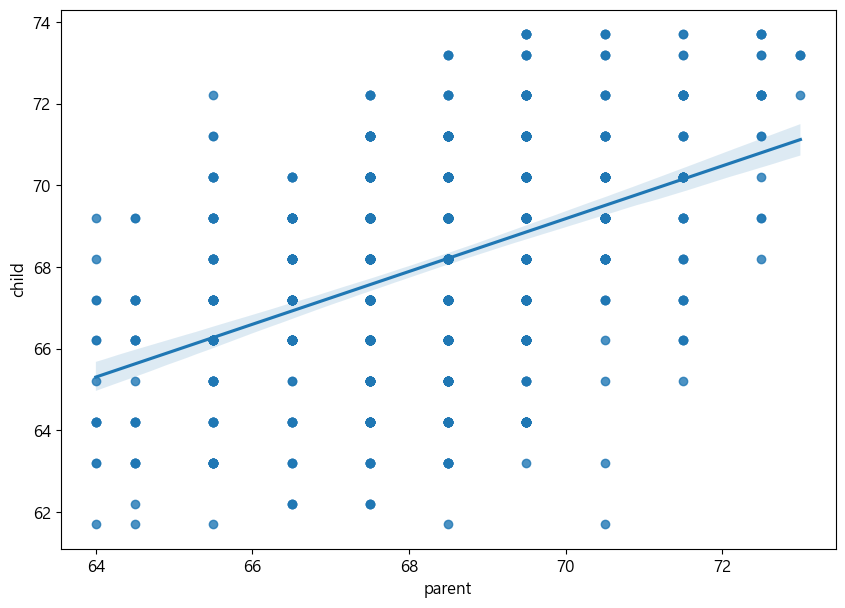

In [38]:
sb.regplot(df3, x ='parent', y='child')
plt.show()
plt.close()

- 결과해석 : 부모 키에 따른 자식의 키는 양의 상관관계를 갖는다.

## #03. 추론통계

In [39]:
model = ols("child ~ parent", data=df3)
model

In [40]:
fit = model.fit()
fit

In [41]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  child   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     246.8
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.73e-49
Time:                        14:37:39   Log-Likelihood:                -2063.6
No. Observations:                 928   AIC:                             4131.
Df Residuals:                     926   BIC:                             4141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9415      2.811      8.517      0.0

### 결과 해석

#### 모형적합도 해석
1) R-squared / Adj. R-squared : child(y)를 parent(x)가 약 21%설명한다.

2) F-statistic / Prob(F-statistic) : 1.73e-49로서 유의수준 0.05보다 작으므로 유의미성 검증결과 유의미하다. 


#### 독립변수보고 해석
1) coef : $자식의키(child) = 0.6463 \times 부모의키(parent) + 23.9415$. 부모의키가 1이 증가할때 자식의키는 0.6463 증가했다. 

2) p값 : 모집단에서 계수가 0일때, 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률

### 결과보고
### 1. 모형적합도 보고
- `자식의 키(child)`에 대하여 `부모의 키(parent)`을 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미 하였다. (F(1,926)=246.8, p <0.05)

### 2. 독립변수에 대해 보고
- `부모의 키(parent)` 의 회귀계수는 0.6463이므로, `자식의 키(child)`에 대해서 유의미한 예측변인인 것으로 나타났다. (t(926)=15.711, p<0.05)


### 3. 당신이 자식을 낳는다면 키가 어느정도일지 예측해 보시오.
- $자식의키(child) = 0.6463 \times 부모의키(parent) + 23.9415$
- 답 : 170.68219 센치미터


인치 X 2.54 = 센치미터


## #04. 회귀분석 모듈 활용

In [42]:
model, fit, summmary, table, result, goodness, varstr = ext_ols(df3, x='parent', y='child')

In [43]:
model

In [44]:
fit

In [46]:
summmary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  child   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     246.8
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.73e-49
Time:                        14:37:41   Log-Likelihood:                -2063.6
No. Observations:                 928   AIC:                             4131.
Df Residuals:                     926   BIC:                             4141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9415      2.811      8.517      0.000      18.425      29.458
parent         0.6463      0.041     15.711      0.000       0.566       0.727
==============================================================================
Omnibus:                       11.057   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.944
Skew:                          -0.241   Prob(JB):                      0.00420
Kurtosis:                       2.775   Cond. No.                     2.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
table

,,B,표준오차,β,t,유의확률,VIF
종속변수,독립변수,,,,,,
child,parent,0.6463,0.041,0,15.711*,0.000,1.0


In [48]:
result

'𝑅(0.210), 𝑅^2(0.210), 𝐹(246.8), 유의확률(1.73e-49), Durbin-Watson(0.046)'

In [49]:
goodness

'child에 대하여 parent로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(1,926) = 246.8, p < 0.05).'

In [50]:
varstr

['parent의 회귀계수는 0.6463(p<0.05)로, child에 대하여 유의미한 예측변인인 것으로 나타났다.']

### 모델구축

In [58]:
parent = 170 / 2.54
child = 0.6463 * parent + 23.9415

In [61]:
child * 2.54

170.68241